# Stocks - Quick Python Analysis


Date: 2/14/2017
Author: Russell Bigley

Below is a simple python program to look at stock prices over time.  It utilizes the 'yahoo_finance library.  
The main goal was to look at a few stocks in the food industry that might correlate with business and business strategy.  More refined work would be needed to define the scope of stocks and other indicators that might better serve the needs of Western Paper Distributers.  This is a simple example of some analysis and unforseen challenges that can be found in data.  

One issue with this data was the timing of a stock split.  The initial graph indicates a large dip in the stock prices of both Starbucks and Yum!.  A correction was applied to indicate what the true growth of the stock might be.

Additional work might include additional graphing variables such as GDP, individual EPS, dividends, etc.

These factors would be important contributers to Western Paper Distributers margins and may create additional decision support systems.

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
from yahoo_finance import Share
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
import numpy as np
import os

%matplotlib inline

#a short list of restaraunt affiliated stocks
eat = Share('EAT') #Maggiono's & Chili's
#bom = Share('BOM') #SUBWAY is privately held
mcd = Share('MCD') #MCDONALDS
sbux = Share('SBUX') #STARBUX
yum = Share('YUM') #YUM BRANDS, KFC, Pizza Hut

share_list = [sbux,eat,mcd,yum]

In [32]:
#a simple function to pull historical stock price data
def stock_df(stockname):
    return pd.DataFrame(stockname.get_historical('2008-01-01', '2017-01-31'))

In [33]:
stocks_dfs = {}
for share in share_list:
    try:
        print(share.get_name() +" - "+ share.get_price() + " - " +share.get_trade_datetime() + " - "+share.get_currency())
        print(share.get_percent_change_from_200_day_moving_average())
        truncated_stock_name = share.get_name().split(' ')[0]
        stocks_dfs[truncated_stock_name] = stock_df(share)
    #need to convert dtypes
        stocks_dfs[truncated_stock_name]['Date'] = stocks_dfs[truncated_stock_name]['Date'].astype(datetime)
        stocks_dfs[truncated_stock_name]['Close'] = stocks_dfs[truncated_stock_name]['Close'].astype(float)

    except OSError as err:
        print("OS error: {0}".format(err))
    except ValueError:
        print("Not sure what the error is.")
    except:
        print("Unexpected error:", sys.exc_info()[0])


Starbucks Corporation - 56.3099 - 2017-02-14 17:28:00 UTC+0000 - USD
Brinker International, Inc. Com - 45.55 - 2017-02-13 21:02:00 UTC+0000 - USD
McDonald's Corporation Common S - 125.51 - 2017-02-14 15:15:00 UTC+0000 - USD
Yum! Brands, Inc. - 68.26 - 2017-02-14 15:45:00 UTC+0000 - USD


In [34]:
backup_stocks_dfs = stocks_dfs

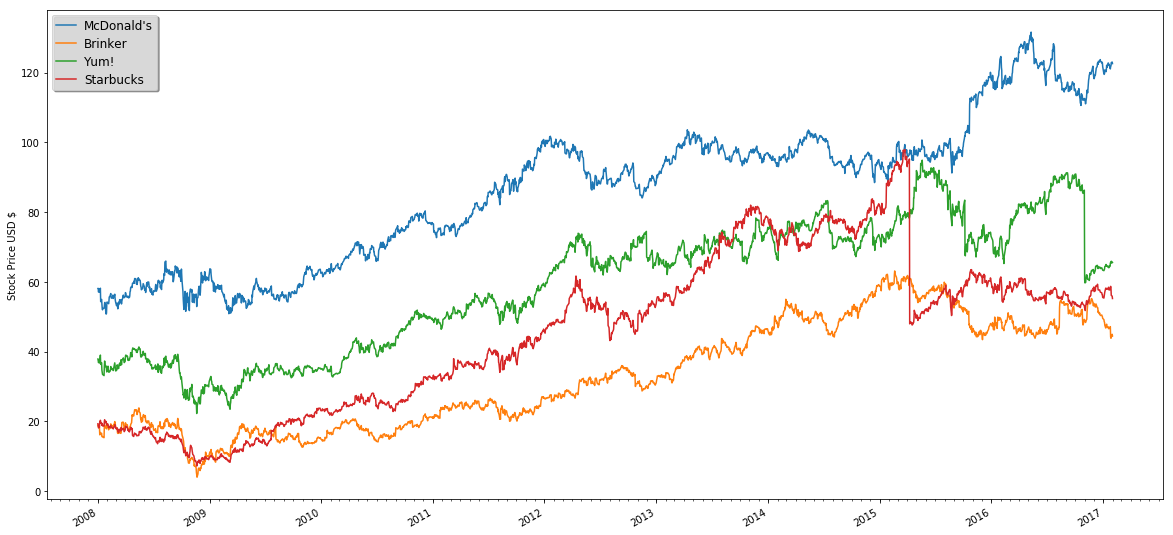

In [35]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig, ax = plt.subplots(figsize=(20, 10))

for stock in stocks_dfs:
    #print(stocks_dfs[stock].head())
    #stocks_dfs[stock].plot.line(x='Date',y='Close')
    #plt.plot(stocks_dfs[stock]['Date'], stocks_dfs[stock]['Close'])

#example taken from pylab examples
#http://matplotlib.org/examples/pylab_examples/date_demo1.html    
    dates = stocks_dfs[stock]['Date']
    close = stocks_dfs[stock]['Close']
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`. 
    ax.plot_date(dates, close, '-', label=stock)

# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

fig.autofmt_xdate()
plt.ylabel('Stock Price USD $')
plt.show()

# Stabucks & YUM Stock Split

The starbucks stock split on 3/30/2015.

The following graph will 'correct' for this.

YUM Brands also had a stock split within the date range of the graph (Nov. 1, 2016).

https://www.stocksplithistory.com/yum-brands/

In [36]:
stocks_dfs['Starbucks'].loc[stocks_dfs['Starbucks']['Date'] >= '2015-04-01', ['Close']] = stocks_dfs['Starbucks']['Close']*2

In [37]:
stocks_dfs['Yum!'].loc[stocks_dfs['Yum!']['Date'] >= '2016-10-31', ['Close']] = stocks_dfs['Yum!']['Close']*2

In [64]:
stocks_dfs['Starbucks'].loc[stocks_dfs['Starbucks']['Close'] > 150, ['Close']] = 80

In [ ]:
stocks_dfs['Yum!'].loc[stocks_dfs['Yum!']['Date'] >= '2016-10-31', ['Close']]

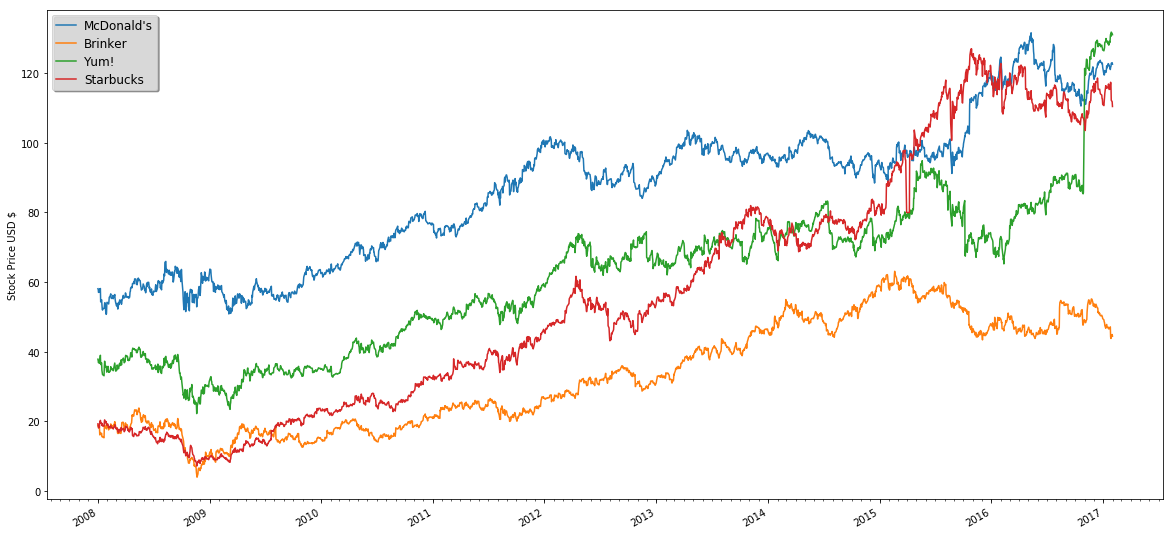

In [65]:
years = YearLocator()   # every year
months = MonthLocator()  # every month
yearsFmt = DateFormatter('%Y')
fig, ax = plt.subplots(figsize=(20, 10))

for stock in stocks_dfs:
#example taken from pylab examples
#http://matplotlib.org/examples/pylab_examples/date_demo1.html    
    dates = stocks_dfs[stock]['Date']
    close = stocks_dfs[stock]['Close']
# Create plots with pre-defined labels.
# Alternatively, you can pass labels explicitly when calling `legend`. 
    ax.plot_date(dates, close, '-', label=stock)

# Now add the legend with some customizations.
legend = ax.legend(loc='upper left', shadow=True)

# The frame is matplotlib.patches.Rectangle instance surrounding the legend.
frame = legend.get_frame()
frame.set_facecolor('0.90')

# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')

for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
    
# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

fig.autofmt_xdate()
plt.ylabel('Stock Price USD $')
plt.show()